In [130]:
import pandas as pd
import numpy as np

In [131]:
df = pd.read_csv("data/crimedata_csv_AllNeighbourhoods_AllYears.csv")
df.head(5)

#need to combine 'YEAR' to 'DAY' and 'HOUR' to 'MINUTE'

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Theft from Vehicle,2005,1,12,0,5,7XX E 38TH AVE,Kensington-Cedar Cottage,493519.6776,5.453665e+06
1,Theft from Vehicle,2009,8,30,19,0,7XX E 38TH AVE,Kensington-Cedar Cottage,493519.6776,5.453665e+06
2,Theft from Vehicle,2019,7,18,0,0,7XX E 38TH AVE,Kensington-Cedar Cottage,493534.1447,5.453655e+06
3,Theft from Vehicle,2016,4,21,21,30,7XX E 38TH AVE,Kensington-Cedar Cottage,493553.1258,5.453664e+06
4,Theft from Vehicle,2013,2,17,19,0,7XX E 38TH AVE,Kensington-Cedar Cottage,493577.4517,5.453663e+06


There are 10 columns about the types of crimes, infomation about date and time, address, community areas, and geographic locations. Date and time are separated into different columns, which should be together in new columns.

`HUNDRED_BLOCK`, `X`, and `Y` can be deleted since there is no point to define each location right now; `X`, and `Y` are not even actual locations. It will come back to think about what to do about these columns later.

In [132]:
#checks the shape
df.shape

#871216 rows and 10 columns

(871216, 10)

---
# **Duplicate**
- check if there are deplicated rows and columns
- delete them if there are

In [133]:
#checks dupulicated rows
df.duplicated().sum()

31657

In [134]:
#delete the duplicated rows and checks the results
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [135]:
### comment out b/c of taking a long time to run
# #checks dupulicated columns
# df.T.duplicated().sum()

# #result: 0

In [136]:
#checks the shape again
df.shape

#839559 rows and 10 columns

(839559, 10)

---
# **Formatting Data**
- check types for columns and change them if they are not appropriate
- combine info. for date and time into 3 different columns with a data type
- delete unnecessary columns
- make a copy for time series analysis -- **might delete later**

In [137]:
#checks the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839559 entries, 0 to 871215
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TYPE           839559 non-null  object 
 1   YEAR           839559 non-null  int64  
 2   MONTH          839559 non-null  int64  
 3   DAY            839559 non-null  int64  
 4   HOUR           839559 non-null  int64  
 5   MINUTE         839559 non-null  int64  
 6   HUNDRED_BLOCK  839547 non-null  object 
 7   NEIGHBOURHOOD  839415 non-null  object 
 8   X              839486 non-null  float64
 9   Y              839486 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 70.5+ MB


In [138]:
#get column names for date and time
dateTime = df.iloc[:, 1:6].columns
dateTime

Index(['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE'], dtype='object')

In [139]:
##concatenates columns for date and time
##then changes the type to datatime style

#date only
df['Date'] = pd.to_datetime(df[dateTime[:3]])
#date and time
df['DateTime'] = pd.to_datetime(df[dateTime])
#date and time that is floored
df['DateTime_floor'] = pd.to_datetime(df[dateTime[:4]])

df.head(2)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Date,DateTime,DateTime_floor
0,Theft from Vehicle,2005,1,12,0,5,7XX E 38TH AVE,Kensington-Cedar Cottage,493519.6776,5.453665e+06,2005-01-12,2005-01-12 00:05:00,2005-01-12 00:00:00
1,Theft from Vehicle,2009,8,30,19,0,7XX E 38TH AVE,Kensington-Cedar Cottage,493519.6776,5.453665e+06,2009-08-30,2009-08-30 19:00:00,2009-08-30 19:00:00


In [140]:
#delets original cplumns for date and time
df.drop(columns=['MONTH', 'DAY', 'HOUR', 'MINUTE'], inplace=True)
df.head(2)

,TYPE,YEAR,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Date,DateTime,DateTime_floor
0,Theft from Vehicle,2005,7XX E 38TH AVE,Kensington-Cedar Cottage,493519.6776,5.453665e+06,2005-01-12,2005-01-12 00:05:00,2005-01-12 00:00:00
1,Theft from Vehicle,2009,7XX E 38TH AVE,Kensington-Cedar Cottage,493519.6776,5.453665e+06,2009-08-30,2009-08-30 19:00:00,2009-08-30 19:00:00


In [141]:
#checks each type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839559 entries, 0 to 871215
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   TYPE            839559 non-null  object        
 1   YEAR            839559 non-null  int64         
 2   HUNDRED_BLOCK   839547 non-null  object        
 3   NEIGHBOURHOOD   839415 non-null  object        
 4   X               839486 non-null  float64       
 5   Y               839486 non-null  float64       
 6   Date            839559 non-null  datetime64[ns]
 7   DateTime        839559 non-null  datetime64[ns]
 8   DateTime_floor  839559 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(1), object(3)
memory usage: 64.1+ MB


In [142]:
#makes a copy of the dataframe without the four columns for time series analysis
#['HUNDRED_BLOCK', 'NEIGHBOURHOOD', 'X', 'Y']
time_series = df.copy()
time_series.drop(columns=['HUNDRED_BLOCK', 'NEIGHBOURHOOD', 'X', 'Y'], inplace=True)
time_series.head(2)

,TYPE,YEAR,Date,DateTime,DateTime_floor
0,Theft from Vehicle,2005,2005-01-12,2005-01-12 00:05:00,2005-01-12 00:00:00
1,Theft from Vehicle,2009,2009-08-30,2009-08-30 19:00:00,2009-08-30 19:00:00


---
# **Missing Data**

In [143]:
#checks null values
df.isna().sum()

TYPE                0
YEAR                0
HUNDRED_BLOCK      12
NEIGHBOURHOOD     144
X                  73
Y                  73
Date                0
DateTime            0
DateTime_floor      0
dtype: int64

In [144]:
#checks null values %
df.isna().mean()*100

TYPE              0.000000
YEAR              0.000000
HUNDRED_BLOCK     0.001429
NEIGHBOURHOOD     0.017152
X                 0.008695
Y                 0.008695
Date              0.000000
DateTime          0.000000
DateTime_floor    0.000000
dtype: float64

There are 4 columns that have missing values, which are `HUNDRED_BLOCK`, `NEIGHBOURHOOD`, `X`, and `Y`. They can be just deleted because all portions are less than 3%. However, they shoud be explored first in case these missing values can be filled.

[HUNDRED_BLOCK](##HUNDRED_BLOCK)</div></br>
[NEIGHBOURHOOD](##NEIGHBOURHOOD)</div>

---

## HUNDRED_BLOCK
---

I don't know the meaning of whatever I'm doing here. They might be just deleted and started over from the scratch

In [145]:
#to see what values in other columns for null values in the 'HUNDRED_BLOCK' column
df[df['HUNDRED_BLOCK'].isna()]

,TYPE,YEAR,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Date,DateTime,DateTime_floor
101595,Theft of Vehicle,2005,NaN,Victoria-Fraserview,495178.0,5452000.0,2005-02-12,2005-02-12 22:30:00,2005-02-12 22:00:00
175762,Break and Enter Commercial,2012,NaN,Oakridge,491285.0,5453433.0,2012-12-14,2012-12-14 08:52:00,2012-12-14 08:00:00
223185,Break and Enter Residential/Other,2004,NaN,Mount Pleasant,492807.0,5457236.0,2004-05-13,2004-05-13 09:00:00,2004-05-13 09:00:00
223186,Break and Enter Residential/Other,2006,NaN,Oakridge,491854.0,5452682.0,2006-06-21,2006-06-21 04:00:00,2006-06-21 04:00:00
477480,Other Theft,2004,NaN,Central Business District,491490.0,5458911.0,2004-11-05,2004-11-05 16:00:00,2004-11-05 16:00:00
477481,Other Theft,2004,NaN,Strathcona,493739.0,5457844.0,2004-12-08,2004-12-08 09:30:00,2004-12-08 09:00:00
477482,Other Theft,2005,NaN,Strathcona,493928.0,5457452.0,2005-07-18,2005-07-18 17:52:00,2005-07-18 17:00:00
477483,Other Theft,2003,NaN,Arbutus Ridge,488775.0,5455977.0,2003-05-07,2003-05-07 20:51:00,2003-05-07 20:00:00
477484,Other Theft,2003,NaN,Kitsilano,489325.0,5457606.0,2003-08-08,2003-08-08 14:30:00,2003-08-08 14:00:00
477485,Other Theft,2004,NaN,Fairview,489894.0,5456715.0,2004-12-26,2004-12-26 16:52:00,2004-12-26 16:00:00


In [146]:
list_h = df[df['HUNDRED_BLOCK'].isna()].index
list_h

Int64Index([101595, 175762, 223185, 223186, 477480, 477481, 477482, 477483,
            477484, 477485, 694268, 694269],
           dtype='int64')

In [147]:
df.iloc[list_h[0]]['X']

495178.0

In [148]:
#in case
for i in list_h:
    x = df.iloc[list_h[0]]['X']
    y = df.iloc[list_h[0]]['Y']
    
    cnt = df[(df['X'] == x) & (df['Y'] == y)]['X'].count()

    if cnt > 1:
        print(df.iloc[list_h[0]], '\n', df[(df['X'] == x) & (df['Y'] == y)], '\n---------------\n')
    

In [149]:
#see if there are closer data for X and/or Y
df[(df['X'] >= 495177.9000) & (df['X'] < 495178.0200)]

,TYPE,YEAR,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Date,DateTime,DateTime_floor
74211,Theft of Bicycle,2019,18XX E GEORGIA ST,Grandview-Woodland,495178.010,5.458414e+06,2019-06-10,2019-06-10 00:00:00,2019-06-10 00:00:00
101595,Theft of Vehicle,2005,NaN,Victoria-Fraserview,495178.000,5.452000e+06,2005-02-12,2005-02-12 22:30:00,2005-02-12 22:00:00
110991,Theft of Vehicle,2007,18XX E GEORGIA ST,Grandview-Woodland,495178.010,5.458414e+06,2007-11-02,2007-11-02 16:30:00,2007-11-02 16:00:00
110992,Theft of Vehicle,2008,18XX E GEORGIA ST,Grandview-Woodland,495178.010,5.458414e+06,2008-06-07,2008-06-07 22:00:00,2008-06-07 22:00:00
110993,Theft of Vehicle,2018,18XX E GEORGIA ST,Grandview-Woodland,495178.010,5.458414e+06,2018-11-06,2018-11-06 20:00:00,2018-11-06 20:00:00
238746,Break and Enter Residential/Other,2004,18XX E GEORGIA ST,Grandview-Woodland,495178.010,5.458414e+06,2004-03-08,2004-03-08 23:30:00,2004-03-08 23:00:00
238747,Break and Enter Residential/Other,2006,18XX E GEORGIA ST,Grandview-Woodland,495178.010,5.458414e+06,2006-10-17,2006-10-17 08:00:00,2006-10-17 08:00:00
238748,Break and Enter Residential/Other,2008,18XX E GEORGIA ST,Grandview-Woodland,495178.010,5.458414e+06,2008-09-04,2008-09-04 10:00:00,2008-09-04 10:00:00
238749,Break and Enter Residential/Other,2017,18XX E GEORGIA ST,Grandview-Woodland,495178.010,5.458414e+06,2017-09-04,2017-09-04 00:14:00,2017-09-04 00:00:00
239342,Break and Enter Residential/Other,2007,18XX VENABLES ST,Grandview-Woodland,495177.929,5.458217e+06,2007-08-11,2007-08-11 11:59:00,2007-08-11 11:00:00


In [150]:
df[(df['Y'] >= 5452000.0) & (df['Y'] < 5452001.0)]

,TYPE,YEAR,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Date,DateTime,DateTime_floor
91531,Theft of Bicycle,2016,71XX MAPLE ST,Kerrisdale,488869.2609,5.452000e+06,2016-08-03,2016-08-03 21:53:00,2016-08-03 21:00:00
101595,Theft of Vehicle,2005,NaN,Victoria-Fraserview,495178.0000,5.452000e+06,2005-02-12,2005-02-12 22:30:00,2005-02-12 22:00:00
107709,Theft of Vehicle,2016,15XX ATLAS LANE,Kerrisdale,489714.0071,5.452000e+06,2016-08-08,2016-08-08 21:00:00,2016-08-08 21:00:00
153387,Vehicle Collision or Pedestrian Struck (with I...,2003,69XX BLOCK VICTORIA DR,Victoria-Fraserview,495228.0000,5.452000e+06,2003-05-02,2003-05-02 22:06:00,2003-05-02 22:00:00
184978,Break and Enter Commercial,2017,15XX ATLAS LANE,Kerrisdale,489714.0071,5.452000e+06,2017-01-20,2017-01-20 00:40:00,2017-01-20 00:00:00
286931,Break and Enter Residential/Other,2004,70XX PRINCE EDWARD ST,Sunset,492892.9803,5.452000e+06,2004-02-02,2004-02-02 09:00:00,2004-02-02 09:00:00
623010,Other Theft,2022,69XX BUTLER ST,Killarney,497542.6382,5.452000e+06,2022-05-27,2022-05-27 11:51:00,2022-05-27 11:00:00
732162,Theft from Vehicle,2017,15XX ATLAS LANE,Kerrisdale,489714.0071,5.452000e+06,2017-01-20,2017-01-20 00:40:00,2017-01-20 00:00:00
856677,Theft from Vehicle,2007,69XX DUMFRIES ST,Victoria-Fraserview,494555.2795,5.452001e+06,2007-10-28,2007-10-28 12:00:00,2007-10-28 12:00:00
856696,Theft from Vehicle,2017,69XX ELLIOTT ST,Victoria-Fraserview,496010.2854,5.452001e+06,2017-12-14,2017-12-14 01:00:00,2017-12-14 01:00:00


In [151]:
#see if there is any closer data for X and/or Y
df[(df['Y'] >= 5452000.0) & (df['Y'] < 5452001.0)][['Y', 'HUNDRED_BLOCK']].value_counts()

Y             HUNDRED_BLOCK         
5.452000e+06  15XX ATLAS LANE           3
              69XX BLOCK VICTORIA DR    1
              71XX MAPLE ST             1
              70XX PRINCE EDWARD ST     1
              69XX BUTLER ST            1
5.452001e+06  69XX DUMFRIES ST          1
              69XX MCKINNON ST          1
              69XX ELLIOTT ST           1
dtype: int64

---

## NEIGHBOURHOOD
---

in this section, five dataframes are created  - Original is \<df>

1. `df_neighb`: copied of \<df> but dropped rows with 'OFFSET TO PROTECT PRIVACY'
2. `CBD`: copyed of `1`: selected only the 'HUNDRED_BLOCK' column and only rows with 'Central Business District'
3. `CBD_distrib`: distribution of `2`
4. `CBD_X_yes`: data that values include 'X' from `3`
5. `CBD_X_yes`: data, which does NOT include 'X' from `3`

### df

In [152]:
#to see what values in other columns for null values in the 'HUNDRED_BLOCK' column
df[df['NEIGHBOURHOOD'].isna()]

#'OFFSET TO PROTECT PRIVACY' doesn't look good as data. they can be deleted 
#144 data with null values in the column

,TYPE,YEAR,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Date,DateTime,DateTime_floor
146394,Vehicle Collision or Pedestrian Struck (with F...,2017,14XX BURRARD STREET BRDG,NaN,490027.3016,5.458077e+06,2017-12-19,2017-12-19 02:04:00,2017-12-19 02:00:00
146395,Vehicle Collision or Pedestrian Struck (with F...,2005,14XX CAMBIE STREET BRDG,NaN,491642.1726,5.457693e+06,2005-06-07,2005-06-07 00:47:00,2005-06-07 00:00:00
146726,Vehicle Collision or Pedestrian Struck (with I...,2003,0X TERMINAL AV / QUEBEC ST,NaN,NaN,NaN,2003-06-22,2003-06-22 18:58:00,2003-06-22 18:00:00
147715,Vehicle Collision or Pedestrian Struck (with I...,2004,13XX PACIFIC BLVD / 198 DRAKE ST,NaN,NaN,NaN,2004-11-07,2004-11-07 18:24:00,2004-11-07 18:00:00
147833,Vehicle Collision or Pedestrian Struck (with I...,2003,14XX BLOCK S E MARINE DR,NaN,NaN,NaN,2003-09-20,2003-09-20 17:15:00,2003-09-20 17:00:00
...,...,...,...,...,...,...,...,...,...
466822,Offence Against a Person,2020,OFFSET TO PROTECT PRIVACY,NaN,0.0000,0.000000e+00,2020-05-20,2020-05-20 00:00:00,2020-05-20 00:00:00
466967,Offence Against a Person,2005,OFFSET TO PROTECT PRIVACY,NaN,0.0000,0.000000e+00,2005-07-03,2005-07-03 00:00:00,2005-07-03 00:00:00
466968,Offence Against a Person,2009,OFFSET TO PROTECT PRIVACY,NaN,0.0000,0.000000e+00,2009-06-20,2009-06-20 00:00:00,2009-06-20 00:00:00
467276,Offence Against a Person,2023,OFFSET TO PROTECT PRIVACY,NaN,0.0000,0.000000e+00,2023-07-22,2023-07-22 00:00:00,2023-07-22 00:00:00


In [153]:
#see the distribution of 'HUNDRED_BLOCK' for null values in the 'NEIGHBOURHOOD'
df[df['NEIGHBOURHOOD'].isna()]['HUNDRED_BLOCK'].value_counts().sort_values()

#the majourity is 'OFFSET TO PROTECT PRIVACY (48 data)'
#just delete them

NANAIMO ST / 1ST AV            1
15XX WEST 4TH AV               1
16XX BLOCK VICTORIA AVE        1
17XX GRANVILLE STREET BRDG     1
1XX BLOCK E HASTINGS ST        1
                              ..
14XX BURRARD STREET BRDG       3
99XXXX UNKNOWN                 3
15XX GRANVILLE STREET BRDG     3
14XX CAMBIE STREET BRDG        5
OFFSET TO PROTECT PRIVACY     48
Name: HUNDRED_BLOCK, Length: 85, dtype: int64

### df_neighb

In [154]:
#makes a copy of the dataframe and delete the rows with 'OFFSET TO PROTECT PRIVACY'
df_neighb = df.copy()
df_neighb.drop(df_neighb[df_neighb['HUNDRED_BLOCK'] == 'OFFSET TO PROTECT PRIVACY'].index, inplace=True)

#checks if successfully deleted
df_neighb[df_neighb['HUNDRED_BLOCK'] == 'OFFSET TO PROTECT PRIVACY']

,TYPE,YEAR,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Date,DateTime,DateTime_floor


In [155]:
#to confirm the deletion in a different way
df_neighb[df_neighb['NEIGHBOURHOOD'].isna()]['HUNDRED_BLOCK'].value_counts().sort_values()

#secceeded

CLARK DR                                    1
14XX BLOCK S E MARINE DR                    1
14XX W KING EDWARD AV / GRANVILLE ST        1
15XX BLOCK W 70TH AV / 8600 GRANVILLE ST    1
15XX GRANVILLE BRDG                         1
                                           ..
SW MARINE DR / TAMATH CRES                  2
14XX BURRARD STREET BRDG                    3
99XXXX UNKNOWN                              3
15XX GRANVILLE STREET BRDG                  3
14XX CAMBIE STREET BRDG                     5
Name: HUNDRED_BLOCK, Length: 84, dtype: int64

In [156]:
#checks the total after the deletion. should be 96 = 144 - 48
df_neighb[df_neighb['NEIGHBOURHOOD'].isna()]['HUNDRED_BLOCK'].value_counts().sum()

#good

96

---

#### distribution comparisons

In [157]:
#checks null values % for original <df>
df.isna().mean()*100

TYPE              0.000000
YEAR              0.000000
HUNDRED_BLOCK     0.001429
NEIGHBOURHOOD     0.017152
X                 0.008695
Y                 0.008695
Date              0.000000
DateTime          0.000000
DateTime_floor    0.000000
dtype: float64

In [158]:
#checks null values % for <df_neighb>
df_neighb.isna().mean()*100

TYPE              0.000000
YEAR              0.000000
HUNDRED_BLOCK     0.001510
NEIGHBOURHOOD     0.012076
X                 0.009183
Y                 0.009183
Date              0.000000
DateTime          0.000000
DateTime_floor    0.000000
dtype: float64

In [159]:
#and checks null values for original <df>
df.isna().sum()

TYPE                0
YEAR                0
HUNDRED_BLOCK      12
NEIGHBOURHOOD     144
X                  73
Y                  73
Date                0
DateTime            0
DateTime_floor      0
dtype: int64

In [160]:
#and checks null values for <df_neighb>
df_neighb.isna().sum()

TYPE               0
YEAR               0
HUNDRED_BLOCK     12
NEIGHBOURHOOD     96
X                 73
Y                 73
Date               0
DateTime           0
DateTime_floor     0
dtype: int64

---

#### list of community names

In [161]:
#to see unique values of 'NEIGHBOURHOOD'
#uses the original dataframe <df> to avoid missing some areas
#(though <df_neighb> has the same result for the list of community names)
pd.DataFrame(df['NEIGHBOURHOOD'].value_counts().sort_index())

,NEIGHBOURHOOD
Arbutus Ridge,9309
Central Business District,218802
Dunbar-Southlands,11335
Fairview,53147
Grandview-Woodland,46680
Hastings-Sunrise,29597
Kensington-Cedar Cottage,40292
Kerrisdale,11376
Killarney,16280
Kitsilano,42332


##### from here, just play with data. delete later

In [162]:
pd.DataFrame(df_neighb['NEIGHBOURHOOD'].value_counts().sort_index())

,NEIGHBOURHOOD
Arbutus Ridge,8967
Central Business District,211751
Dunbar-Southlands,10950
Fairview,51493
Grandview-Woodland,42776
Hastings-Sunrise,27807
Kensington-Cedar Cottage,37592
Kerrisdale,11012
Killarney,15140
Kitsilano,40896


In [163]:
test1 = pd.concat([pd.DataFrame(df['NEIGHBOURHOOD'].value_counts().sort_index()), pd.DataFrame(df_neighb['NEIGHBOURHOOD'].value_counts().sort_index())], axis=1)
test1

,NEIGHBOURHOOD,NEIGHBOURHOOD
Arbutus Ridge,9309,8967
Central Business District,218802,211751
Dunbar-Southlands,11335,10950
Fairview,53147,51493
Grandview-Woodland,46680,42776
Hastings-Sunrise,29597,27807
Kensington-Cedar Cottage,40292,37592
Kerrisdale,11376,11012
Killarney,16280,15140
Kitsilano,42332,40896


In [164]:
test1['dev'] = round((test1.iloc[:, 1]/test1.iloc[:, 0])*100, 2)
test1

,NEIGHBOURHOOD,NEIGHBOURHOOD,dev
Arbutus Ridge,9309,8967,96.33
Central Business District,218802,211751,96.78
Dunbar-Southlands,11335,10950,96.60
Fairview,53147,51493,96.89
Grandview-Woodland,46680,42776,91.64
Hastings-Sunrise,29597,27807,93.95
Kensington-Cedar Cottage,40292,37592,93.30
Kerrisdale,11376,11012,96.80
Killarney,16280,15140,93.00
Kitsilano,42332,40896,96.61


##### till here

There are a few names that are not in the area dataset from the city vancouver portal data website __[Local area boundary](https://opendata.vancouver.ca/explore/dataset/local-area-boundary/export/?disjunctive.name&dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6ImxvY2FsLWFyZWEtYm91bmRhcnkiLCJvcHRpb25zIjp7ImRpc2p1bmN0aXZlLm5hbWUiOnRydWV9fSwiY2hhcnRzIjpbeyJhbGlnbk1vbnRoIjp0cnVlLCJ0eXBlIjoiY29sdW1uIiwiZnVuYyI6IkNPVU5UIiwic2NpZW50aWZpY0Rpc3BsYXkiOnRydWUsImNvbG9yIjoiIzAyNzlCMSJ9XSwieEF4aXMiOiJuYW1lIiwibWF4cG9pbnRzIjo1MCwic29ydCI6IiJ9XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=12,49.2474,-123.12402)__.</br> the downloaded csv file from the page: local-area-boundary.csv

'Neighborhood' col: 24 areas (local-area-boundary.csv: 22 areas)
- Central Business District (Downtown??)
- Musqueam (combined in Dunbar-Southlands??)
- Stanley Park (no define)

############################################################

1. should check what areas for Central Business District.</br>
2. the Musqueam area is in the Dunbar-Southlands area; I don't know why Vancouver police devide them. maybe other areas are included? the data for the Musqueam should be checked what areas are frm</br>
3. the data of Stanley Park might not be used -> think about it later

### CBD

In [165]:
#creats a new dataframe with only data for the 'Central Business District' in the 'NEIGHBOURHOOD' col.
CBD = pd.DataFrame(df_neighb[df_neighb['NEIGHBOURHOOD']=='Central Business District'][['HUNDRED_BLOCK']])
CBD

,HUNDRED_BLOCK
830,7XX EXPO BLVD
831,7XX EXPO BLVD
832,7XX EXPO BLVD
833,7XX EXPO BLVD
834,7XX EXPO BLVD
...,...
870753,7XX DUNSMUIR ST
870754,7XX DUNSMUIR ST
870755,7XX DUNSMUIR ST
870756,7XX DUNSMUIR ST


In [166]:
CBD.shape

(211751, 1)

In [167]:
#checks the distribution
CBD.value_counts()

HUNDRED_BLOCK             
7XX GRANVILLE ST              7329
7XX W GEORGIA ST              5255
6XX GRANVILLE ST              4141
3XX ABBOTT ST                 3123
5XX W HASTINGS ST             2962
                              ... 
6XX BLOCK HELMCKEN ST            1
2XX BLOCK DRAKE ST               1
2XX BLOCK DUNSMUIR ST            1
DRAKE ST / ROUNDHOUSE MEWS       1
1000D BEACH AVE                  1
Length: 1510, dtype: int64

In [168]:
#checks total: shuld be 211750 (211751 - 1: a column row)
CBD.value_counts().sum()

211750

### CBD_distrib

In [169]:
#makes a dataframe with the distribution
CBD_distrib = pd.DataFrame(CBD['HUNDRED_BLOCK'].value_counts())
CBD_distrib.head()


,HUNDRED_BLOCK
7XX GRANVILLE ST,7329
7XX W GEORGIA ST,5255
6XX GRANVILLE ST,4141
3XX ABBOTT ST,3123
5XX W HASTINGS ST,2962


In [170]:
CBD_distrib.shape[0]

1510

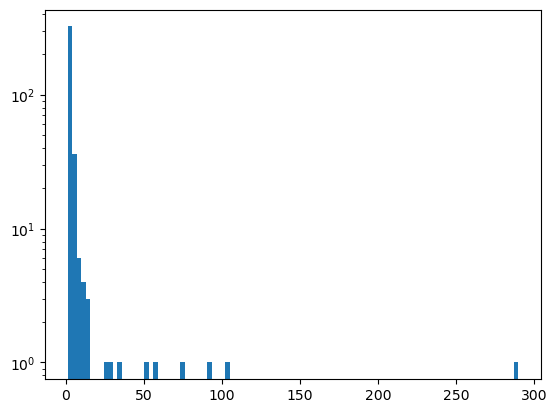

In [171]:
#just making a distribution graph
import matplotlib.pyplot as plt
plt.figure()
plt.hist(CBD_distrib.value_counts(), bins=100)
plt.yscale('log')
plt.show()

In [172]:
#just looking the data that has more than 800 (<-- no reason to choose the number. it's just the number displayed all data without cutting)
CBD_distrib[CBD_distrib['HUNDRED_BLOCK']>800]

,HUNDRED_BLOCK
7XX GRANVILLE ST,7329
7XX W GEORGIA ST,5255
6XX GRANVILLE ST,4141
3XX ABBOTT ST,3123
5XX W HASTINGS ST,2962
9XX GRANVILLE ST,2787
1XX WATER ST,2617
3XX W GEORGIA ST,2310
5XX RICHARDS ST,2293
7XX DUNSMUIR ST,2259


In [173]:
#want to keep the index but also want that info in a regular col.
CBD_distrib['st'] = CBD_distrib.index
CBD_distrib.head(5)

,HUNDRED_BLOCK,st
7XX GRANVILLE ST,7329,7XX GRANVILLE ST
7XX W GEORGIA ST,5255,7XX W GEORGIA ST
6XX GRANVILLE ST,4141,6XX GRANVILLE ST
3XX ABBOTT ST,3123,3XX ABBOTT ST
5XX W HASTINGS ST,2962,5XX W HASTINGS ST


### CBD_X_yes and CBD_X_no

##### ceparate data into two groups: with X and without X

In [174]:
#makes a dataframe that has only the data contains 'X' in its values for a street number
CBD_X_yes = CBD_distrib[CBD_distrib['st'].str.contains(r'^[0-9]*X+\s') | (CBD_distrib['st'].str.contains(r'\s[0-9]*X+\s'))]
#starting with at least 0 numeric followed by at least 1 'X' and a space after that

CBD_X_yes

,HUNDRED_BLOCK,st
7XX GRANVILLE ST,7329,7XX GRANVILLE ST
7XX W GEORGIA ST,5255,7XX W GEORGIA ST
6XX GRANVILLE ST,4141,6XX GRANVILLE ST
3XX ABBOTT ST,3123,3XX ABBOTT ST
5XX W HASTINGS ST,2962,5XX W HASTINGS ST
...,...,...
8XX BLOCK GRIFFITHS WAY,1,8XX BLOCK GRIFFITHS WAY
8XX BLOCK DRAKE ST,1,8XX BLOCK DRAKE ST
8XX BLOCK CAMBIE ST,1,8XX BLOCK CAMBIE ST
7XX BLOCK W CORDOVA ST,1,7XX BLOCK W CORDOVA ST


In [175]:
#makes a dataframe that has only the data that doesn't contains 'X' in its values for a street number
CBD_X_no = CBD_distrib[CBD_distrib['st'].str.contains(r'^[0-9]*X+\s')==False]
CBD_X_no

,HUNDRED_BLOCK,st
SEYMOUR ST / W PENDER ST,669,SEYMOUR ST / W PENDER ST
DUNSMUIR ST / RICHARDS ST,552,DUNSMUIR ST / RICHARDS ST
RICHARDS ST / W PENDER ST,550,RICHARDS ST / W PENDER ST
CAMBIE ST / W PENDER ST,546,CAMBIE ST / W PENDER ST
GRANVILLE ST / ROBSON ST,540,GRANVILLE ST / ROBSON ST
...,...,...
PACIFIC BLVD / EXPO BLVD,1,PACIFIC BLVD / EXPO BLVD
PACIFIC BLVD / BEATTY WALK,1,PACIFIC BLVD / BEATTY WALK
BUTE ST / W GEORGIA ST,1,BUTE ST / W GEORGIA ST
BURRARD ST / ALBERNI ST,1,BURRARD ST / ALBERNI ST


<span style='color:red'>V CHECK</span> 1510 = 918 + 592 is the same number from \<CBD_distrib.shape[0]>

In [176]:
CBD_X_yes.value_counts().sort_index()

#it looks like the first two disits are numeric for the 4-disit street numbers

HUNDRED_BLOCK  st                        
1              10XX BLOCK HOWE ST            1
               10XX BLOCK MAINLAND ST        1
               10XX BLOCK MARINASIDE CRES    1
               10XX BLOCK PACIFIC BLVD       1
               11XX  GRANVILLE ST            1
                                            ..
2962           5XX W HASTINGS ST             1
3123           3XX ABBOTT ST                 1
4141           6XX GRANVILLE ST              1
5255           7XX W GEORGIA ST              1
7329           7XX GRANVILLE ST              1
Length: 918, dtype: int64

In [177]:
#just a double check
CBD_X_yes[CBD_X_yes['st'].str.contains('XXX')]

#it confirms there are no a disit+'XXX' for a street number

,HUNDRED_BLOCK,st


In [178]:
#gets data with 4 digit street numbers and
#checks the distribution of the first digit of them 
CBD_X_yes[CBD_X_yes['st'].str.contains('^[0-9]{2}XX')]['st'].str[:2].value_counts()

10    49
11    35
12    28
13    28
14    24
15    12
16     7
17     2
18     2
19     1
22     1
Name: st, dtype: int64

started with 22 would be in bewtween 2200 and 2299 for street numbers, which is not in downtown Vancouver (see [vancouver-street-map](https://vancouvermap360.com/vancouver-street-map)) because the map shows the maximum number is 2000 close to the Stanley Park. Let's check what actual info. is for the number

In [179]:
#looks the data starting with 22 in the dataframe: <CBD_X_yes>
CBD_X_yes[CBD_X_yes['st'].str.contains('^22')]

,HUNDRED_BLOCK,st
22XX WEST MALL,1,22XX WEST MALL


by googling the address, the street is found in the UBC campas. Is it a human error or is UBC considered as the Central Business District area?

first, it shuld be checked if there are more data with the street in the entire data

In [180]:
#checks with the exact adress
df[df['HUNDRED_BLOCK'] == '22XX WEST MALL']

,TYPE,YEAR,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Date,DateTime,DateTime_floor
771932,Theft from Vehicle,2003,22XX WEST MALL,Central Business District,492746.0,5458827.0,2003-10-02,2003-10-02 14:00:00,2003-10-02 14:00:00


In [181]:
#checks with the street name
test = df[df['HUNDRED_BLOCK'].notna()]
test[test['HUNDRED_BLOCK'].str.contains('WEST MALL')]

,TYPE,YEAR,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Date,DateTime,DateTime_floor
771932,Theft from Vehicle,2003,22XX WEST MALL,Central Business District,492746.0,5458827.0,2003-10-02,2003-10-02 14:00:00,2003-10-02 14:00:00


there is only one data with the street. UBC is categorised as a [UEL](http://www.universityendowmentlands.gov.bc.ca/) area, but it might be classified in the Musqueam area in this dataset.

NOT FINISHED THE EXPLORE YET

---

FROM HERE:

1. get all streets in DT
2. check if data in CBD_X_yes are all from DT by using `1.`

However, NOT PROPERLY DONE. it's just an explore phase right now

In [182]:
#a distribution of streets('HUNDRED_BLOCK') for the 'Musqueam' area
df_neighb[df_neighb['NEIGHBOURHOOD'] == 'Musqueam']['HUNDRED_BLOCK'].value_counts()

41XX SALISH DR               81
39XX W 51ST AVE              51
41XX YUCULTA CRES            36
41XX STAULO CRES             32
40XX STAUTLO AVE             26
                             ..
DUNBAR ST / W 49TH AVE        1
HOLLAND ST / SW MARINE DR     1
SALISH DR / MUSQUEAM AVE      1
SALISH DR / STAULO CRES       1
6588B HUM LU SUM DR           1
Name: HUNDRED_BLOCK, Length: 98, dtype: int64

In [183]:
#imports the property_addresses file
property_addresses = pd.read_csv('data/property-addresses.csv')
property_addresses.head(5)

,,,CIVIC_NUMBER;Geo Local Area;Geom;P_PARCEL_ID;PCOORD;SITE_ID;STD_STREET;geo_point_2d
"1096;Kensington-Cedar Cottage;""{""""coordinates"""": [-123.08275793407572",49.23441642635126],"""""type"""": """"Point""""}"";__FJ15TY;74421696;014814714;E 39TH AV;49.23441642635126",-123.082758
"1069;Kensington-Cedar Cottage;""{""""coordinates"""": [-123.08332195623385",49.234016640768054],"""""type"""": """"Point""""}"";__FJ15U6;74821665;007372744;E 40TH AV;49.234016640768054",-123.083322
"1088;Kensington-Cedar Cottage;""{""""coordinates"""": [-123.08293285021475",49.23347000944893],"""""type"""": """"Point""""}"";__FJ15UO;74821688;014812746;E 40TH AV;49.23347000944893",-123.082933
"1136;Sunset;""{""""coordinates"""": [-123.08211066225876",49.232497778147966],"""""type"""": """"Point""""}"";__FJ15V0;75022136;013985809;E 41ST AV;49.232497778147966",-123.082111
"1170;Sunset;""{""""coordinates"""": [-123.08168622705996",49.232493581422204],"""""type"""": """"Point""""}"";__FJ15V6;75022170;009136274;E 41ST AV;49.232493581422204",-123.081686


In [184]:
#resets index
property_addresses = property_addresses.reset_index()
property_addresses.head(2)

,level_0,level_1,level_2,CIVIC_NUMBER;Geo Local Area;Geom;P_PARCEL_ID;PCOORD;SITE_ID;STD_STREET;geo_point_2d
0,"1096;Kensington-Cedar Cottage;""{""""coordinates""...",49.23441642635126],"""""type"""": """"Point""""}"";__FJ15TY;74421696;01481...",-123.082758
1,"1069;Kensington-Cedar Cottage;""{""""coordinates""...",49.234016640768054],"""""type"""": """"Point""""}"";__FJ15U6;74821665;00737...",-123.083322


In [185]:
#gets data that is for downtown in the first column
property_addresses = property_addresses[property_addresses['level_0'].str.contains('Downtown')]
property_addresses.head(2)

,level_0,level_1,level_2,CIVIC_NUMBER;Geo Local Area;Geom;P_PARCEL_ID;PCOORD;SITE_ID;STD_STREET;geo_point_2d
278,"205;Downtown;""{""""coordinates"""": [-123.10003901...",49.28304829219912],"""""type"""": """"Point""""}"";__FJ17BM;19058007;00854...",-123.100039
279,"237;Downtown;""{""""coordinates"""": [-123.10006290...",49.282562523030926],"""""type"""": """"Point""""}"";__FJ17C0;19058077;00693...",-123.100063


In [186]:
#spilits the word-blocks in the column 'level_2' by a semicolon
property_addresses = property_addresses['level_2'].str.split(';', expand=True)
property_addresses.head(2)

,0,1,2,3,4,5
278,"""""type"""": """"Point""""}""",__FJ17BM,19058007,008547009,MAIN ST,49.28304829219912
279,"""""type"""": """"Point""""}""",__FJ17C0,19058077,006934161,MAIN ST,49.282562523030926


In [187]:
#gets only the second column from the rightmost
st_names_DT = pd.DataFrame(property_addresses[4].value_counts().sort_index().index)

st_names_DT

,0
0,
1,ABBOTT ST
2,ALEXANDER ST
3,ALVIN NAROD MEWS
4,AQUARIUS MEWS
...,...
68,W GEORGIA ST
69,W HASTINGS ST
70,W PENDER ST
71,W WATERFRONT ROAD


In [188]:
#drops the fisrt row, which is 0 for the index values
st_names_DT.drop([0], inplace=True)
st_names_DT

,0
1,ABBOTT ST
2,ALEXANDER ST
3,ALVIN NAROD MEWS
4,AQUARIUS MEWS
5,BAYSHORE DRIVE
...,...
68,W GEORGIA ST
69,W HASTINGS ST
70,W PENDER ST
71,W WATERFRONT ROAD


In [189]:
#displays <CBD_X_yes> 
CBD_X_yes

,HUNDRED_BLOCK,st
7XX GRANVILLE ST,7329,7XX GRANVILLE ST
7XX W GEORGIA ST,5255,7XX W GEORGIA ST
6XX GRANVILLE ST,4141,6XX GRANVILLE ST
3XX ABBOTT ST,3123,3XX ABBOTT ST
5XX W HASTINGS ST,2962,5XX W HASTINGS ST
...,...,...
8XX BLOCK GRIFFITHS WAY,1,8XX BLOCK GRIFFITHS WAY
8XX BLOCK DRAKE ST,1,8XX BLOCK DRAKE ST
8XX BLOCK CAMBIE ST,1,8XX BLOCK CAMBIE ST
7XX BLOCK W CORDOVA ST,1,7XX BLOCK W CORDOVA ST


why `BLOCK` is in a address like `8XX BLOCK DRAKE ST`?

In [190]:
#WHY AM I DOING THIS???
CBD_X_yes['st'].value_counts()

7XX GRANVILLE ST              1
X EXPO BLVD                   1
13XX BLOCK HOWE ST            1
10XX BLOCK EXPO BLVD          1
10XX BLOCK W WATERFRONT RD    1
                             ..
6X KEEFER PL                  1
2XX DRAKE ST                  1
4XX HAMILTON ST               1
1XX E WATERFRONT RD           1
7XX BEACH AV                  1
Name: st, Length: 918, dtype: int64

In [192]:
#deletes the word in a address
CBD_X_yes['st'] = CBD_X_yes['st'].str.replace('BLOCK', '')
CBD_X_yes['st'].value_counts()

#but they shouldn't be deleted because there might be a reason that the word is used for something

C:\Users\robso\AppData\Local\Temp\ipykernel_15336\1433609602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CBD_X_yes['st'] = CBD_X_yes['st'].str.replace('BLOCK', '')


11XX  HORNBY ST       2
5XX  BEATTY ST        2
6XX  BEATTY ST        2
11XX  GRANVILLE ST    2
7XX GRANVILLE ST      1
                     ..
1X E HASTINGS ST      1
6X KEEFER PL          1
2XX DRAKE ST          1
4XX HAMILTON ST       1
7XX BEACH AV          1
Name: st, Length: 914, dtype: int64

In [64]:
list(st_names_DT[0].unique())

['ABBOTT ST',
 'ALEXANDER ST',
 'ALVIN NAROD MEWS',
 'AQUARIUS MEWS',
 'BAYSHORE DRIVE',
 'BEACH AV',
 'BEACH CRESCENT',
 'BEATTY ST',
 'BROUGHTON ST',
 'BURRARD ST',
 'BUTE ST',
 'CAMBIE ST',
 'CANADA PLACE',
 'CARDERO ST',
 'CARRALL ST',
 'CITADEL PARADE',
 'COLUMBIA ST',
 'CONTINENTAL ST',
 'COOPERAGE WAY',
 'DAVIE ST',
 'DENMAN ST',
 'DRAKE ST',
 'DUNSMUIR ST',
 'E CORDOVA ST',
 'E GEORGIA ST',
 'E HASTINGS ST',
 'E PENDER ST',
 'E WATERFRONT ROAD',
 'EXPO BOULEVARD',
 'GRANVILLE ST',
 'GRIFFITHS WAY',
 'HAMILTON ST',
 'HELMCKEN ST',
 'HOMER MEWS',
 'HOMER ST',
 'HORNBY ST',
 'HOWE ST',
 'JERVIS ST',
 'KEEFER PLACE',
 'KEEFER ST',
 'KINGHORNE MEWS',
 'MAIN ST',
 'MAINLAND ST',
 'MARINASIDE CRESCENT',
 'MELVILLE ST',
 'MENCHIONS MEWS',
 'MILROSS AV',
 'NATIONAL AV',
 'NELSON ST',
 'NICOLA ST',
 'PACIFIC BOULEVARD',
 'PACIFIC ST',
 'POWELL ST',
 'QUEBEC ST',
 'REGIMENT SQUARE',
 'RICHARDS ST',
 'ROBSON ST',
 'ROLSTON ST',
 'ROUNDHOUSE MEWS',
 'SEYMOUR ST',
 'SMITHE ST',
 'STRATHMORE 

In [59]:
CBD_X_yes[CBD_X_yes['st'].str.contains('/')]

,HUNDRED_BLOCK,st
5XX W PENDER ST / RICHARDS ST,1,5XX W PENDER ST / RICHARDS ST


# STOPed: at here

**need to reorganize from here to the bottom**

1. `checks whether address is in downtown`
2. `where is Musqueam area refered`

In [88]:
CBD_distrib['st'].str.count(' ').value_counts().sort_index()

1     14
2    468
3    437
4    414
5    168
6      7
7      2
Name: st, dtype: int64

In [89]:
for i in range(1,8):
    display(CBD_distrib[CBD_distrib['st'].str.count(' ') == i])

,HUNDRED_BLOCK,st
PACIFIC BLVD,3,PACIFIC BLVD
DAVIE ST,2,DAVIE ST
100KEEFER ST,1,100KEEFER ST
1000MARINASIDE CRES,1,1000MARINASIDE CRES
UNION ST,1,UNION ST
MIKONG RESTAURANT,1,MIKONG RESTAURANT
LENNOX PUB,1,LENNOX PUB
KEEFER ST,1,KEEFER ST
DUNSMUIR VIADUCT,1,DUNSMUIR VIADUCT
MARINASIDE CRES,1,MARINASIDE CRES


,HUNDRED_BLOCK,st
7XX GRANVILLE ST,7329,7XX GRANVILLE ST
6XX GRANVILLE ST,4141,6XX GRANVILLE ST
3XX ABBOTT ST,3123,3XX ABBOTT ST
9XX GRANVILLE ST,2787,9XX GRANVILLE ST
1XX WATER ST,2617,1XX WATER ST
...,...,...
X MARKET ALY,1,X MARKET ALY
900K DAVIE ST,1,900K DAVIE ST
GRANVILLE ST BRDG,1,GRANVILLE ST BRDG
GEORGIA AT DENMAN,1,GEORGIA AT DENMAN


,HUNDRED_BLOCK,st
7XX W GEORGIA ST,5255,7XX W GEORGIA ST
5XX W HASTINGS ST,2962,5XX W HASTINGS ST
3XX W GEORGIA ST,2310,3XX W GEORGIA ST
8X W PENDER ST,2200,8X W PENDER ST
1XX E HASTINGS ST,1751,1XX E HASTINGS ST
...,...,...
8XX BLOCK HELMCKEN ST,1,8XX BLOCK HELMCKEN ST
8XX BLOCK HAMILTON ST,1,8XX BLOCK HAMILTON ST
8XX BLOCK GRIFFITHS WAY,1,8XX BLOCK GRIFFITHS WAY
8XX BLOCK DRAKE ST,1,8XX BLOCK DRAKE ST


,HUNDRED_BLOCK,st
DUNSMUIR ST / RICHARDS ST,552,DUNSMUIR ST / RICHARDS ST
GRANVILLE ST / ROBSON ST,540,GRANVILLE ST / ROBSON ST
SEYMOUR ST / SMITHE ST,507,SEYMOUR ST / SMITHE ST
ROBSON ST / SEYMOUR ST,361,ROBSON ST / SEYMOUR ST
COLUMBIA ST / KEEFER ST,352,COLUMBIA ST / KEEFER ST
...,...,...
9X BLOCK W HASTINGS ST,1,9X BLOCK W HASTINGS ST
8XX BLOCK W HASTINGS ST,1,8XX BLOCK W HASTINGS ST
8XX BLOCK W GEORGIA ST,1,8XX BLOCK W GEORGIA ST
8XX BLOCK W CORDOVA ST,1,8XX BLOCK W CORDOVA ST


,HUNDRED_BLOCK,st
SEYMOUR ST / W PENDER ST,669,SEYMOUR ST / W PENDER ST
RICHARDS ST / W PENDER ST,550,RICHARDS ST / W PENDER ST
CAMBIE ST / W PENDER ST,546,CAMBIE ST / W PENDER ST
ABBOTT ST / W HASTINGS ST,538,ABBOTT ST / W HASTINGS ST
ABBOTT ST / W PENDER ST,523,ABBOTT ST / W PENDER ST
...,...,...
W CORDOVA ST / GRANVILLE ST,1,W CORDOVA ST / GRANVILLE ST
W CORDOVA ST / CARRALL ST,1,W CORDOVA ST / CARRALL ST
PACIFIC ST OFRP / GRANVILLE BRDG,1,PACIFIC ST OFRP / GRANVILLE BRDG
BUTE ST / W GEORGIA ST,1,BUTE ST / W GEORGIA ST


,HUNDRED_BLOCK,st
W CORDOVA ST / W WATERFRONT RD,6,W CORDOVA ST / W WATERFRONT RD
W GEORGIA ST / STANLEY PARK CSWY,3,W GEORGIA ST / STANLEY PARK CSWY
E PENDER ST / W PENDER ST,3,E PENDER ST / W PENDER ST
5XX W PENDER ST / RICHARDS ST,1,5XX W PENDER ST / RICHARDS ST
E HASTINGS ST / W HASTINGS ST,1,E HASTINGS ST / W HASTINGS ST
GRANVILLE STREET BRDG / SEYMOUR ST OFRP,1,GRANVILLE STREET BRDG / SEYMOUR ST OFRP
GRANVILLE STREET BRDG / HOWE STREET ONRP,1,GRANVILLE STREET BRDG / HOWE STREET ONRP


,HUNDRED_BLOCK,st
E HASTINGS ST / E HASTINGS ST,1,E HASTINGS ST / E HASTINGS ST
W WATERFRONT RD / W WATERFRONT ROAD STRD,1,W WATERFRONT RD / W WATERFRONT ROAD STRD


In [34]:
df.iloc[[396437]]

,TYPE,YEAR,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Date,DateTime,DateTime_floor
396437,Mischief,2013,E HASTINGS ST / E HASTINGS ST,Central Business District,492412.3453,5.458752e+06,2013-07-16,2013-07-16 16:56:00,2013-07-16 16:00:00


**WRONG**
<p style='color:red'>E HASTINGS ST / E HASTINGS ST</p>	

In [93]:
CBD_distrib = CBD_distrib['st'].str.split(' ', expand=True)
CBD_distrib

,0,1,2,3,4,5,6,7
7XX GRANVILLE ST,7XX,GRANVILLE,ST,None,None,None,None,None
7XX W GEORGIA ST,7XX,W,GEORGIA,ST,None,None,None,None
6XX GRANVILLE ST,6XX,GRANVILLE,ST,None,None,None,None,None
3XX ABBOTT ST,3XX,ABBOTT,ST,None,None,None,None,None
5XX W HASTINGS ST,5XX,W,HASTINGS,ST,None,None,None,None
...,...,...,...,...,...,...,...,...
8XX BLOCK GRIFFITHS WAY,8XX,BLOCK,GRIFFITHS,WAY,None,None,None,None
8XX BLOCK DRAKE ST,8XX,BLOCK,DRAKE,ST,None,None,None,None
8XX BLOCK CAMBIE ST,8XX,BLOCK,CAMBIE,ST,None,None,None,None
7XX BLOCK W CORDOVA ST,7XX,BLOCK,W,CORDOVA,ST,None,None,None


---

In [34]:
df_neighb[(df_neighb['HUNDRED_BLOCK'].isna()) & (df_neighb['NEIGHBOURHOOD'].isna())].shape[0]

0

In [32]:
#display all remained data for the 'HUNDRED_BLOCK' colum that 'NEIGHBOURHOOD' has NA in it
test1 = pd.DataFrame(df_neighb[df_neighb['NEIGHBOURHOOD'].isna()]['HUNDRED_BLOCK'].value_counts().sort_index())
pd.set_option('display.max_rows', None)
test1

,HUNDRED_BLOCK
0X TERMINAL AV / QUEBEC ST,1
13XX PACIFIC BLVD / 198 DRAKE ST,1
14XX BLOCK S E MARINE DR,1
14XX BURRARD STREET BRDG,3
14XX CAMBIE STREET BRDG,5
14XX W KING EDWARD AV / GRANVILLE ST,1
15XX BLOCK W 70TH AV / 8600 GRANVILLE ST,1
15XX GRANVILLE BRDG,1
15XX GRANVILLE STREET BRDG,3
15XX W 66TH AV / 8298 GRANVILLE ST,1


---

In [11]:
#looks at values in these two columns
for i in df[['TYPE', 'NEIGHBOURHOOD']]:
    print(i, " n=", df[i].value_counts().count())
    print(df[i].value_counts())
    print('-----------------------------------')

TYPE  n= 11
Theft from Vehicle                                        241509
Other Theft                                               216788
Mischief                                                  105750
Offence Against a Person                                   75962
Break and Enter Residential/Other                          72269
Break and Enter Commercial                                 47423
Theft of Vehicle                                           44779
Theft of Bicycle                                           37034
Vehicle Collision or Pedestrian Struck (with Injury)       29036
Vehicle Collision or Pedestrian Struck (with Fatality)       352
Homicide                                                     314
Name: TYPE, dtype: int64
-----------------------------------
NEIGHBOURHOOD  n= 24
Central Business District    234425
West End                      78205
Strathcona                    56016
Mount Pleasant                54848
Fairview                      53483
Grandview-W

In [12]:
df.drop(columns=['HUNDRED_BLOCK', 'X', 'Y']).to_csv('data/timeSer.csv', index=False)

In [13]:
df[df['NEIGHBOURHOOD'].isna()]

,TYPE,YEAR,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Date,DateTime,DateTime_floor
146394,Vehicle Collision or Pedestrian Struck (with F...,2017,14XX BURRARD STREET BRDG,NaN,490027.3016,5.458077e+06,2017-12-19,2017-12-19 02:04:00,2017-12-19 02:00:00
146395,Vehicle Collision or Pedestrian Struck (with F...,2005,14XX CAMBIE STREET BRDG,NaN,491642.1726,5.457693e+06,2005-06-07,2005-06-07 00:47:00,2005-06-07 00:00:00
146726,Vehicle Collision or Pedestrian Struck (with I...,2003,0X TERMINAL AV / QUEBEC ST,NaN,NaN,NaN,2003-06-22,2003-06-22 18:58:00,2003-06-22 18:00:00
147715,Vehicle Collision or Pedestrian Struck (with I...,2004,13XX PACIFIC BLVD / 198 DRAKE ST,NaN,NaN,NaN,2004-11-07,2004-11-07 18:24:00,2004-11-07 18:00:00
147833,Vehicle Collision or Pedestrian Struck (with I...,2003,14XX BLOCK S E MARINE DR,NaN,NaN,NaN,2003-09-20,2003-09-20 17:15:00,2003-09-20 17:00:00
...,...,...,...,...,...,...,...,...,...
466822,Offence Against a Person,2020,OFFSET TO PROTECT PRIVACY,NaN,0.0000,0.000000e+00,2020-05-20,2020-05-20 00:00:00,2020-05-20 00:00:00
466967,Offence Against a Person,2005,OFFSET TO PROTECT PRIVACY,NaN,0.0000,0.000000e+00,2005-07-03,2005-07-03 00:00:00,2005-07-03 00:00:00
466968,Offence Against a Person,2009,OFFSET TO PROTECT PRIVACY,NaN,0.0000,0.000000e+00,2009-06-20,2009-06-20 00:00:00,2009-06-20 00:00:00
467276,Offence Against a Person,2023,OFFSET TO PROTECT PRIVACY,NaN,0.0000,0.000000e+00,2023-07-22,2023-07-22 00:00:00,2023-07-22 00:00:00


In [14]:
df[df['NEIGHBOURHOOD'].isna()]['HUNDRED_BLOCK'].value_counts()

OFFSET TO PROTECT PRIVACY            49
14XX CAMBIE STREET BRDG               5
15XX GRANVILLE STREET BRDG            3
99XXXX UNKNOWN                        3
14XX BURRARD STREET BRDG              3
                                     ..
7XX SE MARINE DR / 8198 FRASER ST     1
6XX BL0CK KINGSWAY AV                 1
57TH AV / KNIGHT ST                   1
55XX BLOCK CAMBIE ST                  1
CASSIAR ST / E HASTINGS ST            1
Name: HUNDRED_BLOCK, Length: 85, dtype: int64